# Comparador de estrategias: Buy&Hold  VS  Impulso

##### La estrategia Buy & Hold consiste en lo que su propio nombre indica: comprar barato y mantener en el tiempo

##### La estrategia de impulso, tambien llamada de Medias Móviles, consiste en determinar el movimiento más conveniente (compra, venta o espera) en función de los valores del mercado y sus medias móviles.

## Datos de la comparación:

In [1]:
csv="BTC-EUR.csv" #Nombre del archivo que contiene los datos de la cotización según Yahoo Finance
ref_value="Open"  #Valor de referencia del algoritmo y de las medias móviles: "Mean Value", "Open", "High", "Low", "Close"
p_mmr=10  #Período de la Media Móvil Rápida
p_mmi=20  #Período de la Media Móvil Intermedia
p_mml=100  #Período de la Media Móvil Lenta
tax=0.5+0.004 #Comisión del broker por acción y operación (compra o venta)

## Importación de módulos y creación de funciones

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("figure", figsize=[16,9])

In [3]:
def MME(N,data):
    MME=N*["NaN"]
    MME.append(np.mean(data[ref_value][0:N-1]))
    x=data.shape[0]-N
    counter=N
    for i in range(x):
        MME.append(np.mean(data[ref_value][counter-N:counter]))
        counter+=1
    return MME


In [4]:
def AnadirColumna(lista, nombre_lista, DataFrame):
    np.array(lista)
    NewCol=pd.DataFrame(lista, columns=[nombre_lista])
    DataFrame=pd.concat([DataFrame, NewCol], axis=1)
    return DataFrame

## Importación de los datos y creación de columnas auxiliares

In [5]:
data_original=pd.read_csv(csv)
data=data_original
data=data.drop(["Adj Close"], axis=1)
data=data.dropna(axis="rows", how="any")
data["Mean Value"]=(data["High"]+data["Low"])/2

In [6]:
MME_intermedia=MME(p_mmi,data)
MME_rapida=MME(p_mmr,data)
MME_lenta=MME(p_mml,data)
data=AnadirColumna(MME_rapida,"MME_rapida",data)
data=AnadirColumna(MME_intermedia,"MME_intermedia",data)
data=AnadirColumna(MME_lenta,"MME_lenta",data)
data.dropna(axis=0, how="any")
data=data[p_mml:-1]
data.head()

,Date,Open,High,Low,Close,Volume,Mean Value,MME_rapida,MME_intermedia,MME_lenta
100,2014-12-26,261.449982,272.127441,259.169189,269.342102,13478850.0,265.648315,267.19,279.268,293.359
101,2014-12-27,269.062012,270.152771,256.780304,259.435730,12472443.0,263.466537,265.436,277.572,293.07
102,2014-12-28,259.679688,262.856689,255.505539,260.715820,9596153.0,259.181114,263.791,275.31,292.089
103,2014-12-29,261.095490,262.901825,257.021637,257.278046,10123014.0,259.961731,264.566,273.507,291.224
104,2014-12-30,257.318359,259.400940,254.460419,255.561310,10303725.0,256.930679,264.613,271.24,290.538


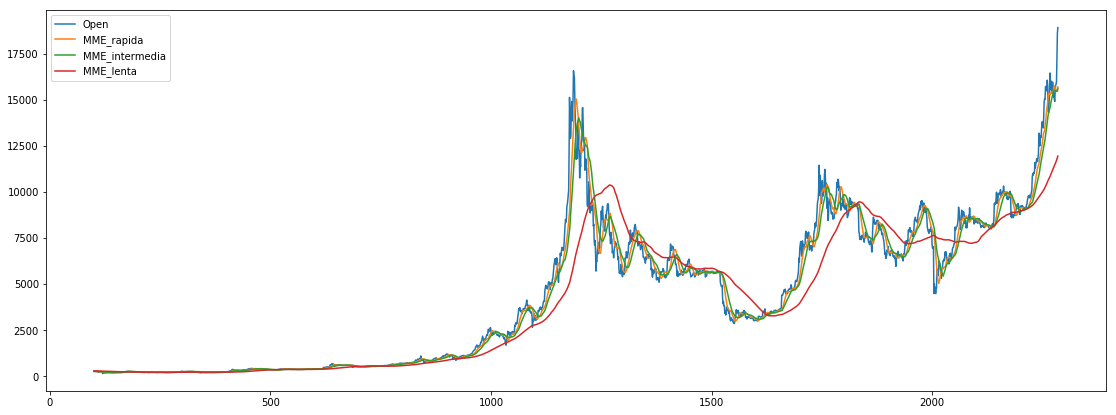

In [7]:
plt.rc("figure", figsize=[19,7])
plt.plot(data[ref_value])
plt.plot(data["MME_rapida"])
plt.plot(data["MME_intermedia"])
plt.plot(data["MME_lenta"])
plt.legend((ref_value,"MME_rapida","MME_intermedia","MME_lenta"))
plt.show()

## Estrategia Buy & Hold

In [8]:
compra=data[ref_value][p_mml]
venta=data[ref_value][-1:]
comision=2*tax
profit=float(venta-compra-comision)
print("Compra en %.2f$, venta en %.2f$. BENEFICIO LIBRE DE COMISIONES DE: %.2f$" %(compra,venta,profit))

Compra en 261.45$, venta en 18909.35$. BENEFICIO LIBRE DE COMISIONES DE: 18646.90$


## Estrategia de Impulso con 3 medias móviles

#### Eliminación de datos por debajo de las medias

Se trata de datos que no son señal de entrada. Mientras que la gráfica muestre estos valores, es mejor no entrar al activo

In [23]:
df=data
for i in range(df.shape[0]):
    if ((df["MME_lenta"][i+p_mml] or df["MME_rapida"][i+p_mml] or df["MME_intermedia"][i+p_mml]) > df[ref_value][i+p_mml]):
        df=df.drop([i+p_mml], axis=0)
#df=df.set_index(np.array(list(range(df.shape[0]))))
df

,Date,Open,High,Low,Close,Volume,Mean Value,MME_rapida,MME_intermedia,MME_lenta
167,2015-03-03,246.126160,255.722961,240.223068,251.924515,4.512726e+07,247.973015,214.32,209.34,239.697
168,2015-03-04,252.182068,256.497620,242.100235,246.539688,3.735939e+07,249.298928,216.504,211.277,239.192
169,2015-03-05,246.221008,255.387604,240.414978,250.388046,3.744551e+07,247.901291,219.694,213.876,238.802
170,2015-03-06,249.864014,251.775803,246.251724,251.519867,2.667057e+07,249.013763,223.419,216.794,238.358
171,2015-03-07,251.124237,256.251953,249.131226,254.782791,1.644001e+07,252.691589,227.302,219.37,237.789
172,2015-03-08,254.941452,256.255646,251.374161,253.000748,2.035033e+07,253.814904,231.198,221.518,237.274
173,2015-03-09,253.423096,269.720764,252.622208,267.313080,5.462267e+07,261.171486,235.242,222.763,236.822
174,2015-03-10,267.548462,279.032837,267.488007,272.494629,6.329579e+07,273.260422,239.848,225.208,236.407
175,2015-03-11,272.275146,281.700287,272.087646,280.981232,3.219937e+07,276.893967,244.082,227.58,235.921
176,2015-03-12,280.742340,280.113159,274.927612,277.013000,3.066554e+07,277.520385,248.189,230.267,235.581


#### Obtención de listas auxiliares

In [24]:
dias=df.index.tolist()
precios=df[ref_value].tolist()
fechas=df["Date"].tolist()

#### Determinación de las operaciones de entrada y salida en el activo

In [52]:
compras=0
ventas=0
n=p_mml+2
operaciones=0
lenght=df.shape[0]
while n < (lenght-1):
    if dias[n] != (dias[n-1]+1):
        print("El día %s inicia una compra a %.2f" %(fechas[n], precios[n]))
        compras += precios[n]
        operaciones += 1
        ultimo="compra"
        if operaciones==1:
            primera="compra"
            valor=precios[n]
    if dias[n] != (dias[n+1]-1):
        print("El día %s se cierra una venta a %.2f" %(fechas[n], precios[n]))
        ventas += precios[n]
        operaciones += 1
        ultimo="venta"
        if operaciones==1:
            primera="venta"
            valor=precios[n]
    n+=1   

El día 2016-01-28 se cierra una venta a 362.49
El día 2016-02-15 inicia una compra a 363.19
El día 2016-02-15 se cierra una venta a 363.19
El día 2016-02-17 inicia una compra a 365.91
El día 2016-03-04 se cierra una venta a 385.41
El día 2016-03-10 inicia una compra a 377.66
El día 2016-03-10 se cierra una venta a 377.66
El día 2016-03-12 inicia una compra a 378.09
El día 2016-03-12 se cierra una venta a 378.09
El día 2016-03-28 inicia una compra a 382.38
El día 2016-03-29 se cierra una venta a 378.98
El día 2016-04-13 inicia una compra a 373.95
El día 2016-08-02 se cierra una venta a 543.12
El día 2016-08-05 inicia una compra a 519.48
El día 2016-08-05 se cierra una venta a 519.48
El día 2016-08-07 inicia una compra a 530.19
El día 2016-08-12 se cierra una venta a 528.73
El día 2016-10-09 inicia una compra a 552.78
El día 2016-10-09 se cierra una venta a 552.78
El día 2016-10-11 inicia una compra a 555.87
El día 2017-03-18 se cierra una venta a 1023.82
El día 2017-03-20 inicia una com

In [33]:
df["Date"][167]

'2015-03-03'

In [34]:
data["Date"][167]

'2015-03-03'

In [38]:
df.index[df["Date"]=='2015-03-03']

Int64Index([167], dtype='int64')

#### Cálculo de beneficios

In [ ]:
if ultimo=="compra":
    ventas += float(df[ref_value][-1:])
if primera=="venta":
    ventas -=valor
beneficio_sin_comision=ventas-compras
beneficio_con_comision=beneficio_sin_comision-operaciones*tax
#print("Beneficio con comision %.2f" % beneficio_con_comision)

## Resultados de la comparación de estrategias

In [ ]:
plt.rc("figure", figsize=[10,10])
plt.bar(["Buy & Hold","Impulso"] ,[profit,beneficio_con_comision])
plt.xlabel("Estrategias")
plt.ylabel("Beneficio Neto")
plt.title("Comparación de estrategias")
plt.show()

In [ ]:
print(16*"*"+"\nRESUMEN DE DATOS\n"+16*"*"+"\n")
print("Buy&Hold: beneficio de %.2f$ en 2 operaciones \nImpulso: beneficio de %.2f$ netos tras %d operaciones" %(profit,beneficio_con_comision, operaciones))
dif=beneficio_con_comision-profit
print("DIFERENCIA: %.2f$" %dif)